### Fig yeast depletion (Fig 6)
- 6A: Plot a representation of the probe selection pipeline
- 6B: Plot the probe selection process for 25S transcript

In [1]:
#Imports
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import gffutils
import seaborn as sns
import numpy as np
import scipy.stats
import itertools

sys.path.append('../scripts/')
from plot_helpers import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Make outdir and load the data
outdir = '../figures/F6/'
os.makedirs(outdir, exist_ok = True)

In [3]:
#Load data
thisdir = os.path.join(results_dir, 'probe_design_results/yeast_200504/probe_design/')
df = pd.read_csv(os.path.join(thisdir, '25S/potential_probes_filt.csv'))
final_df = pd.read_csv(os.path.join(thisdir, 'all_selected_probes.csv'))
final_df = final_df[final_df['target_name'] == '25S'].copy()
df['midpt'] = df['target_start'] + df['length']/2
df.sort_values(by = 'midpt', ascending = True, inplace = True)

In [4]:
#choose the highest Tm probe at each start site:
idx = df.groupby(['start'])['Tm'].transform(max) == df['Tm']
df = df[idx].copy()
start_range = np.arange(df['midpt'].min() - 1, df['midpt'].max()+ 2, 0.5)
range_df = pd.DataFrame(start_range, columns = ['midpt'])
new_df = pd.merge(range_df[['midpt']], df[['unique_id', 'Tm', 'midpt']], 'outer', on = 'midpt')

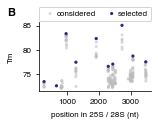

In [5]:
#6B: Plot the selected probes for the 25S/28S in Scer/Spom
panel_name = '6B'
plot = Plotter(corners = [0.21, 0.27, 0.74, 0.60], figsize = (sfig*1.3, sfig))
plot.nudge_corners(top = True, right = True)
plot.setup_axis()

df['midpt'] = df['target_start'] + df['length']/2
df.sort_values(by = 'midpt', ascending = True, inplace = True)

bg = plot.ax.scatter(new_df['midpt'], new_df['Tm'], color = selected_colors[0], alpha = 0.5, s = 10, edgecolors = 'none')
mini_df = new_df[new_df['unique_id'].isin(final_df['unique_id'].values)].copy()
selected = plot.ax.scatter(mini_df['midpt'], mini_df['Tm'], color = selected_colors[3], s = 10, edgecolors = 'none')

plot.ax.legend([bg, selected], ['considered', 'selected'], 
               mode = 'expand', fontsize = 8, ncol = 3, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, 
               borderaxespad=0., handletextpad = -0.2)


plot.set_ylabel('Tm')
plot.set_xlabel('position in 25S / 28S (nt)')
plot.add_letter('B')
plt.savefig(os.path.join(outdir, '{}.png'.format(panel_name)), dpi = 600)